In [23]:
# packages needed
ENV["PYTHON"]=""
using Pkg
Pkg.build("PyCall")
using Plots
pyplot()

# for input files
using MAT
using NumbersFromText
using DelimitedFiles
using CSV

# graphs/linear algebra packages
using MatrixNetworks
using SparseArrays
using LinearAlgebra

# code that I need
include("all_code/code_needed.jl")
include("all_code/methods.jl")
include("all_code/global_functions.jl")
;

  Building Conda ─→ `~/.julia/packages/Conda/CpuvI/deps/build.log`
  Building PyCall → `~/.julia/packages/PyCall/0jMpb/deps/build.log`


In [68]:
#read the data

#1.Chem-Chem
M = Int.(readdlm("../pdatasets/ChCh-Miner_durgbank-chem-chem.tsv"))
A = sparse(M[:,1],M[:,2],1,maximum(M),maximum(M))
A = max.(A,A')
A = largest_component(A)[1]
A = A-Diagonal(A)
dropzeros!(A)
Atrain,Atest = split_train_test(A,0.7);
;

################################################################################################

#2.protein-protein
# M = Matrix(CSV.read("../pdatasets/PP-Pathways_ppi.csv"))
# A = sparse(M[:,1],M[:,2],1,maximum(M),maximum(M))
# A = max.(A,A')
# A = largest_component(A)[1]
# A = A-Diagonal(A)
# dropzeros!(A)
# ;
# @show triangle_density(A)
# @show size(A)
# Atrain,Atest = split_train_test(A,0.7);

################################################################################################

#3.email
# A = Int.(MatrixNetworks.readSMAT("../pdatasets/email.smat"))
# A = max.(A,A')
# @show issymmetric(A)
# size(A)
# A = max.(A,A');
# A = largest_component(A)[1]
# # n = size(A,1)
# @show issymmetric(A)
# size(A)
# Atrain,Atest = split_train_test(A,0.7);

################################################################################################
#4/5.facebook
# T = MAT.matopen("../../fb100data/Facebook100/Caltech36.mat")
# # T = MAT.matopen("../../fb100data/Facebook100/Penn94.mat")
# A = Int.(read(T, "A"));
# A = max.(A,A');
# A = largest_component(A)[1]

# # n = size(A,1)
# @show issymmetric(A)
# size(A)
# Atrain,Atest = split_train_test(A,0.7);

################################################################################################
#6.gpa
# A = Int64.(sparse(generalized_preferential_attachment_graph(5000,1/2,1/2,5)));
# A = largest_component(A)[1]
# Atrain,Atest = split_train_test(A,0.7);
################################################################################################

#7.temporal/collegemsg
# M = NumbersFromText.readmatrix(Int,"../pdatasets/CollegeMsg.txt")
# M = NumbersFromText.readmatrix(Int,"../pdatasets/email-Eu-core-temporal.txt")
# sids = sortperm(M[:,3])
# M = M[sids,:]
# M = M[:,1:2].+1
# map(i->M[i,:] = sort(M[i,:]),1:size(M,1))
# M = unique(M,dims=1)
# n = maximum(M[:,1:2])
# tao = 0.7
# traindays = floor(Int,tao*size(M,1))
# Mtrain = M[1:traindays,:]
# Mtest = M[traindays+1:end,:];
# Atrain = sparse(Mtrain[:,1],Mtrain[:,2],1,n,n); Atrain=max.(Atrain,Atrain')
# Atest = sparse(Mtest[:,1],Mtest[:,2],1,n,n);Atest= max.(Atest,Atest')
# A = sparse(M[:,1],M[:,2],1,n,n);A = max.(A,A')
;

In [72]:
# get largest component
cc = scomponents(Atrain)
cids = findall(cc.map.==argmax(cc.sizes))

Atrain = Atrain[cids,cids]
Atest = Atest[cids,cids]

n = size(Atrain,1)
@show isconnected(Atrain)

isconnected(Atrain) = true


true

topkref = [25, 10, 5]
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 2

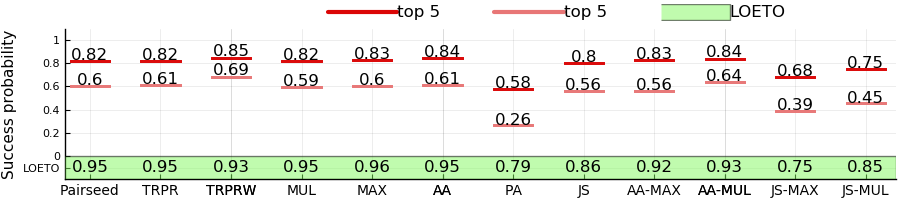

In [74]:
# code that I need
include("all_code/code_needed.jl")
include("all_code/methods.jl")
include("all_code/global_functions.jl")
;

method_used = "BMV"
topk = [25,10,5];
AUC1,AUC2,AUC3,CWEDGES1 = general_pairseed_different_evaluation_varytopk(
        1500,#Edges,#500,
        0.85,
        topk,
        Atrain,
        Atest,
        method_used, #BMV, MRR, recall_topk
        true #"AND" (true) or "OR" (false) experiment
    );
AUCW,cWedgesW = general_wedges(A,500,5,true,"any","all","BMV")
;
pyplot()
include("all_code/plot_values_script.jl")

In [75]:
savefig("1_ChemChem.pdf")

In [76]:
median(CWEDGES1)

3.0

In [77]:
length(collect(triangles(A)))

569466